# Quiz - Linear Regression

### Problem Statement
MedicaInsure is a medical insurance provider. Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, analysis of customer attributes like age, sex, smoking habits, etc. can be crucial in making decisions regarding the premium amount to be charged.

### Data Information

Attribute information:
- age: age of the policyholder
- sex: gender of the policyholder
- bmi: Body Mass Index of the policyholder
- children: number of children of the policyholder
- smoker: whether the policyholder is a smoker or not
- region: region where the policyholder belongs to
- charges: premium charged to the policyholder

### Import Necessary Libraries

In [4]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

sns.set(color_codes=True)

import warnings

from sklearn.linear_model import LinearRegression  # to build linear regression_model
from sklearn.model_selection import (
    train_test_split,
)  # Sklearn package's randomized data splitting function
from sklearn.metrics import mean_squared_error  # to check model performance using RMSE
from sklearn.metrics import mean_absolute_error  # to check model performance using MAS

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

### Load the dataset

In [76]:
insurance_df = pd.read_csv("./datasets/insurance.csv")
insurance_df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

### Check the shape of the dataset

In [6]:
insurance_df.shape

(1338, 7)

### Get the info regarding column datatypes

In [10]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [25]:
insurance_df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

### Create Dummy Variables

In [77]:
insurance_df = pd.get_dummies(insurance_df, columns=['sex', 'smoker', 'region'], drop_first=True)
insurance_df

age     bmi  children      charges  sex_male  smoker_yes  \
0      19  27.900         0  16884.92400         0           1   
1      18  33.770         1   1725.55230         1           0   
2      28  33.000         3   4449.46200         1           0   
3      33  22.705         0  21984.47061         1           0   
4      32  28.880         0   3866.85520         1           0   
...   ...     ...       ...          ...       ...         ...   
1333   50  30.970         3  10600.54830         1           0   
1334   18  31.920         0   2205.98080         0           0   
1335   18  36.850         0   1629.83350         0           0   
1336   21  25.800         0   2007.94500         0           0   
1337   61  29.070         0  29141.36030         0           1   

      region_northwest  region_southeast  region_southwest  
0                    0                 0                 1  
1                    0                 1                 0  
2                    0                 1                 0  
3                    1                 0                 0  
4                    1                 0                 0  
...                ...               ...               ...  
1333                 1                 0                 0  
1334                 0                 0                 0  
1335                 0                 1                 0  
1336                 0                 0                 1  
1337                 1                 0                 0  

[1338 rows x 9 columns]

### Get summary statistics for the numerical columns

In [78]:
insurance_df.describe()

age          bmi     children       charges     sex_male  \
count  1338.000000  1338.000000  1338.000000   1338.000000  1338.000000   
mean     39.207025    30.663397     1.094918  13270.422265     0.505232   
std      14.049960     6.098187     1.205493  12110.011237     0.500160   
min      18.000000    15.960000     0.000000   1121.873900     0.000000   
25%      27.000000    26.296250     0.000000   4740.287150     0.000000   
50%      39.000000    30.400000     1.000000   9382.033000     1.000000   
75%      51.000000    34.693750     2.000000  16639.912515     1.000000   
max      64.000000    53.130000     5.000000  63770.428010     1.000000   

        smoker_yes  region_northwest  region_southeast  region_southwest  
count  1338.000000       1338.000000       1338.000000       1338.000000  
mean      0.204783          0.242900          0.272048          0.242900  
std       0.403694          0.428995          0.445181          0.428995  
min       0.000000          0.000000          0.000000          0.000000  
25%       0.000000          0.000000          0.000000          0.000000  
50%       0.000000          0.000000          0.000000          0.000000  
75%       0.000000          0.000000          1.000000          0.000000  
max       1.000000          1.000000          1.000000          1.000000

### Exploratory Data Analysis

**Plot the distribution plots for all the numerical features and list your observations.**

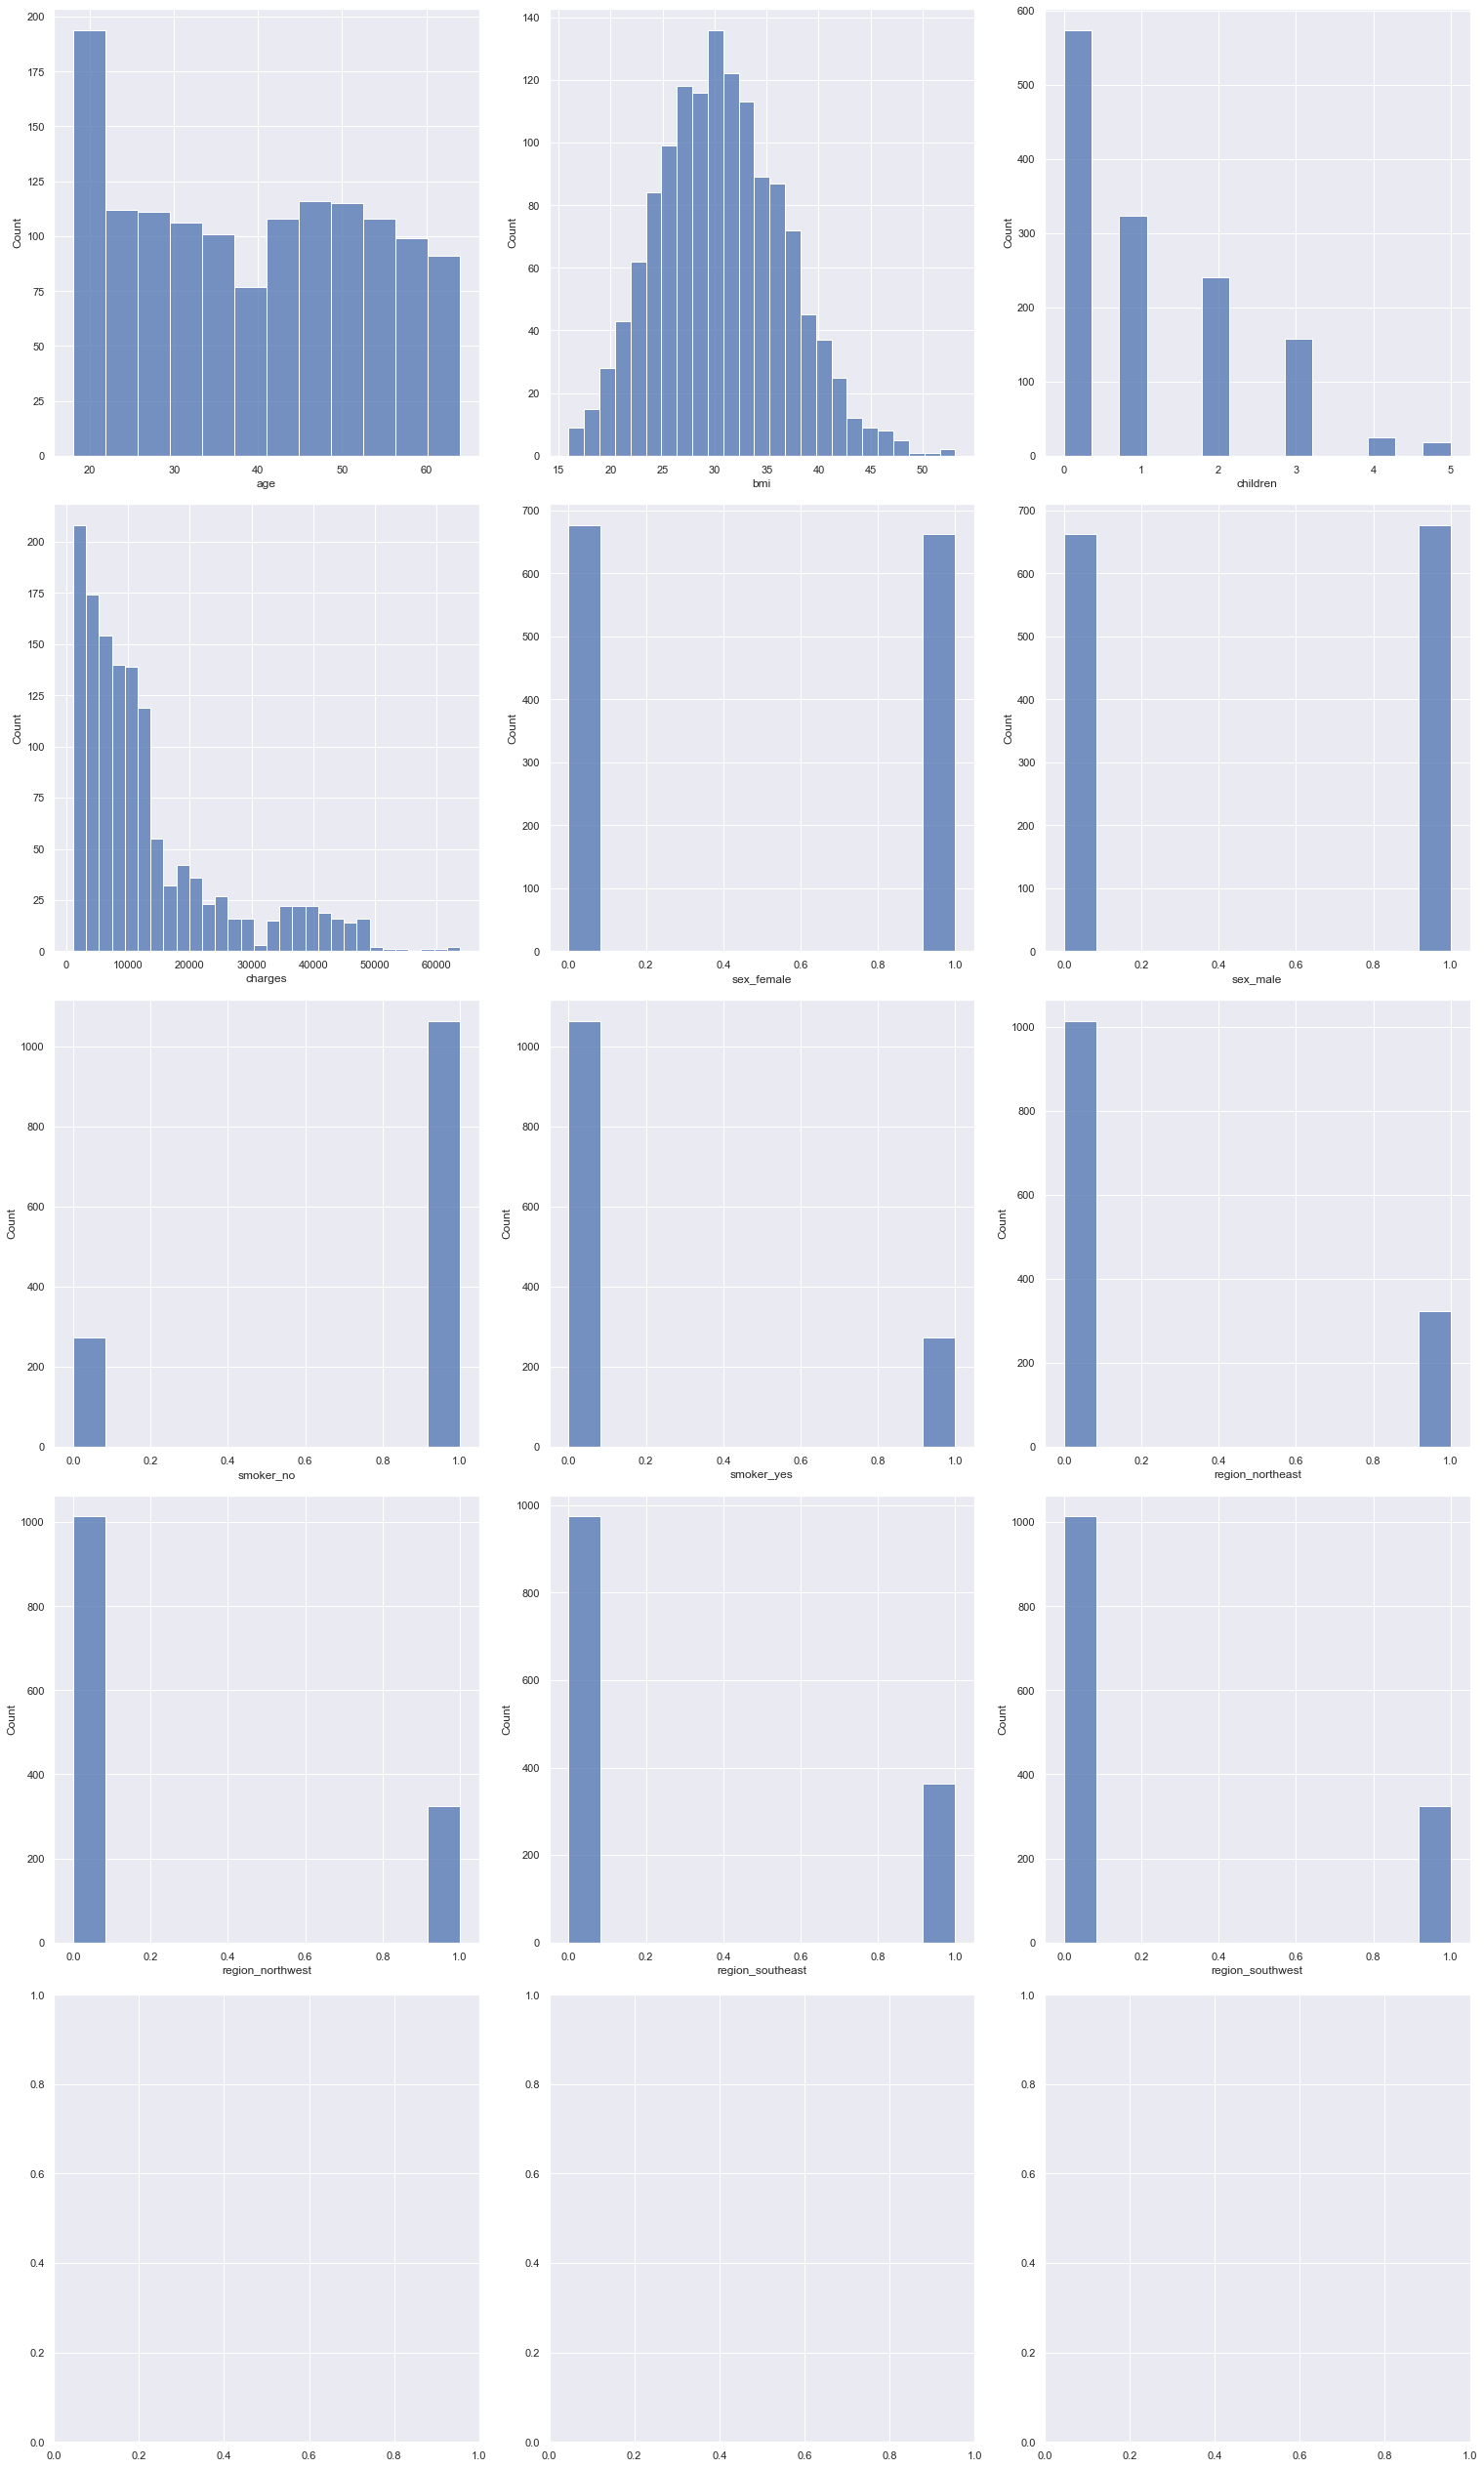

In [60]:
# Plot the hist plot to check for skewness in the distribution
def plotHistogram(df, total_cols):
    variables = df.columns
    num_plots = len(variables)
    total_rows = num_plots//total_cols + 1

    fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)

    for index, var in enumerate(variables):
        row = index//total_cols
        pos = index % total_cols
        fg = sns.histplot(x=var, data=df, ax=axs[row][pos]) # Add discrete=True to 

# Call the method
plotHistogram(insurance_df, 3)

**Plot the scatterplots for features and the target variable "charges" and list your observations.**

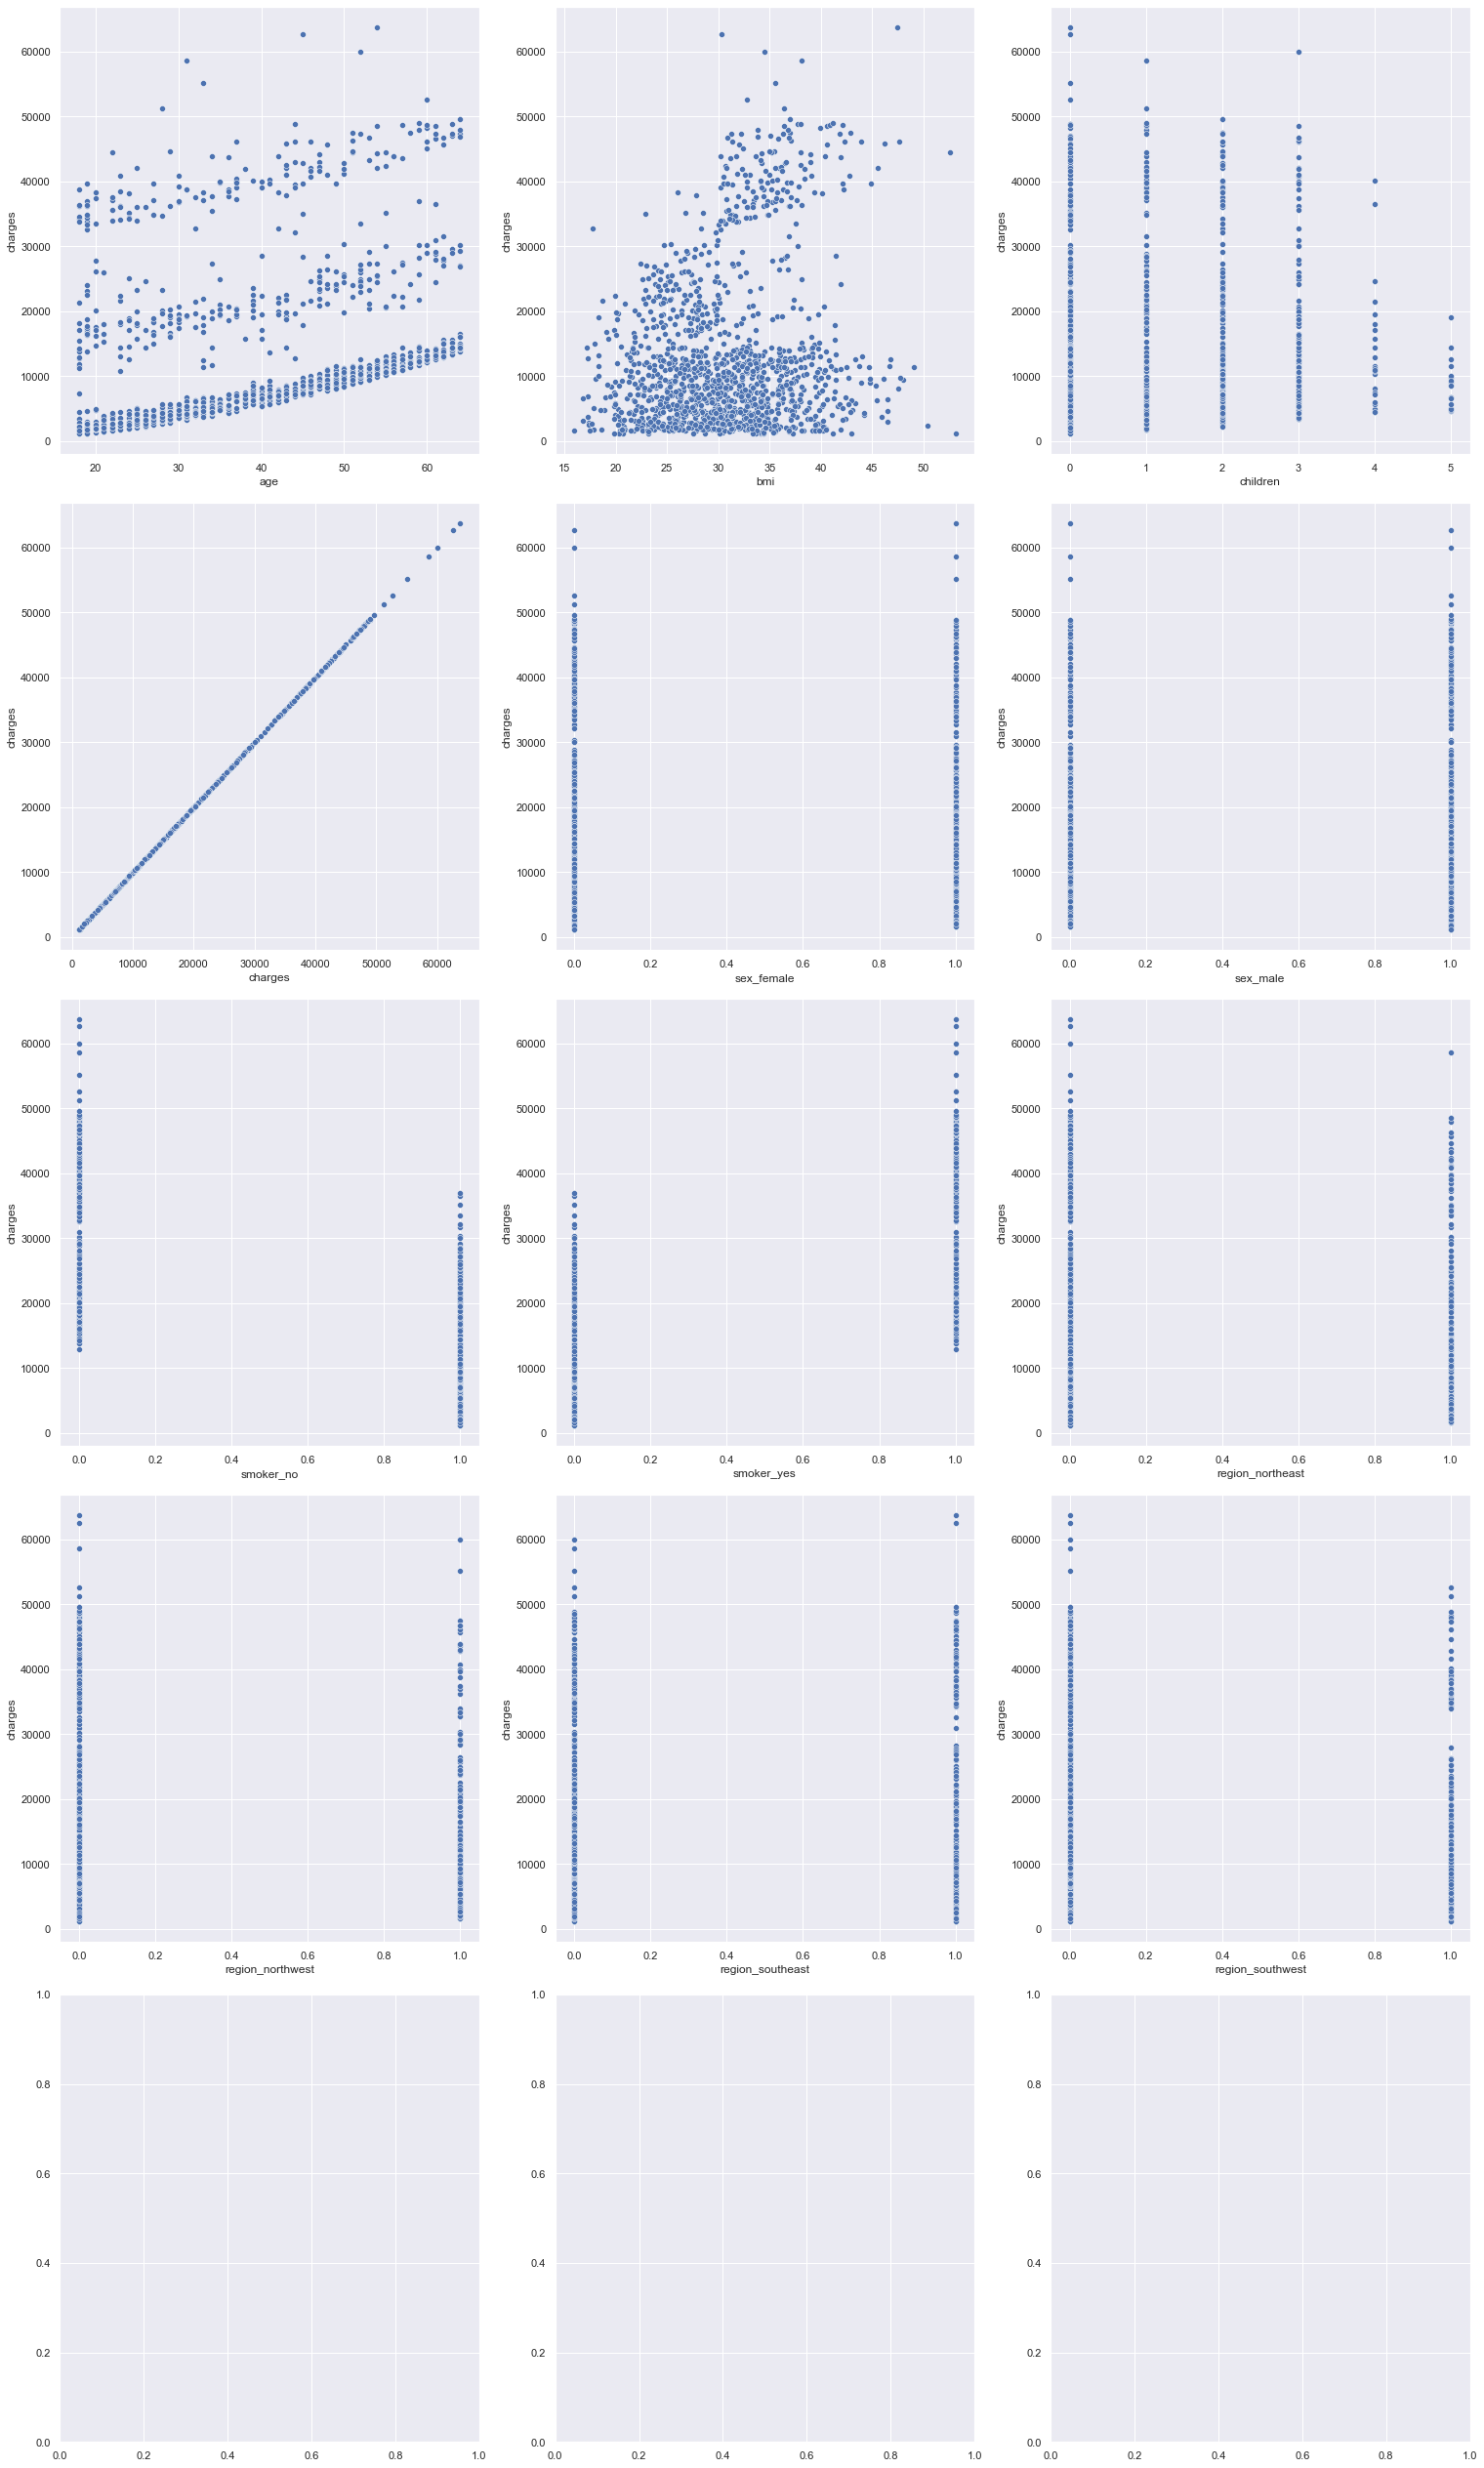

In [30]:
# Plot the hist plot to check for skewness in the distribution
def plotScatterPlot(df, y_col_name, total_cols):
    variables = df.columns
    num_plots = len(variables)
    total_rows = num_plots//total_cols + 1

    fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)

    for index, var in enumerate(variables):
        row = index//total_cols
        pos = index % total_cols
        sns.scatterplot(x=var, y=y_col_name, data=df, ax=axs[row][pos]) 


# Call the method
plotScatterPlot(insurance_df, "charges", 3)

**Plot the correlation heatmap and list your observations.**

<AxesSubplot:>

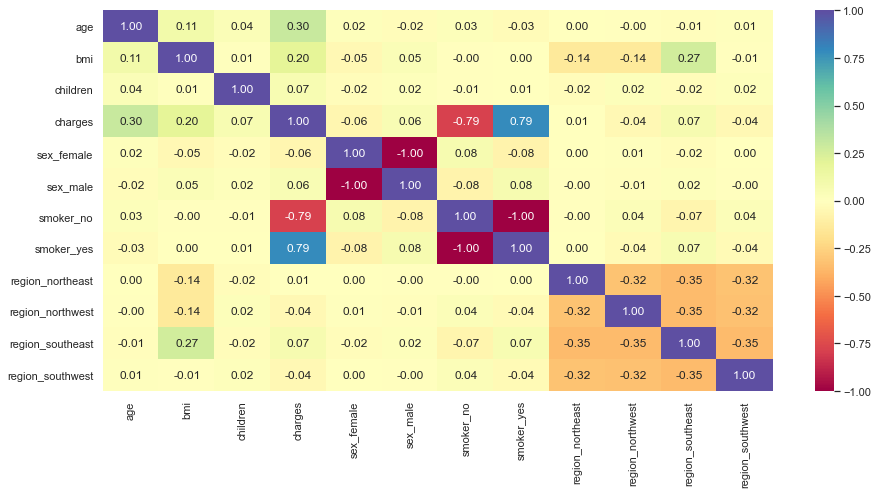

In [46]:
plt.figure(figsize=(15, 7))
sns.heatmap(insurance_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

### Apply log transformation on bmi

In [52]:
df = insurance_df.copy()
df['log_bmi'] = np.log2(df.bmi)
df

age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0      19  27.900         0  16884.92400           1         0          0   
1      18  33.770         1   1725.55230           0         1          1   
2      28  33.000         3   4449.46200           0         1          1   
3      33  22.705         0  21984.47061           0         1          1   
4      32  28.880         0   3866.85520           0         1          1   
...   ...     ...       ...          ...         ...       ...        ...   
1333   50  30.970         3  10600.54830           0         1          1   
1334   18  31.920         0   2205.98080           1         0          1   
1335   18  36.850         0   1629.83350           1         0          1   
1336   21  25.800         0   2007.94500           1         0          1   
1337   61  29.070         0  29141.36030           1         0          0   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
0              1                 0                 0                 0   
1              0                 0                 0                 1   
2              0                 0                 0                 1   
3              0                 0                 1                 0   
4              0                 0                 1                 0   
...          ...               ...               ...               ...   
1333           0                 0                 1                 0   
1334           0                 1                 0                 0   
1335           0                 0                 0                 1   
1336           0                 0                 0                 0   
1337           1                 0                 1                 0   

      region_southwest   log_bmi  
0                    1  4.802193  
1                    0  5.077670  
2                    0  5.044394  
3                    0  4.504938  
4                    0  4.851999  
...                ...       ...  
1333                 0  4.952799  
1334                 0  4.996389  
1335                 0  5.203593  
1336                 1  4.689299  
1337                 0  4.861459  

[1338 rows x 13 columns]

**Plot the kde plot for log_bmi**

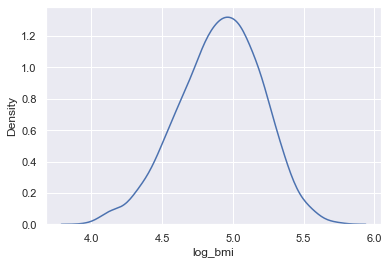

In [61]:
sns.kdeplot(x='log_bmi', data=df);

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_bmi', ylabel='Density'>

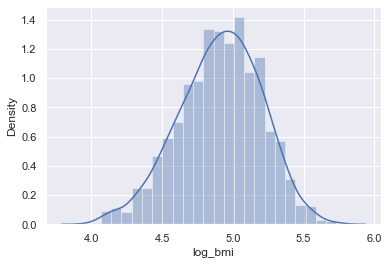

In [67]:
sns.distplot(df['log_bmi'], kde=True)

### Customers from which region have the highest median insurance charge

In [68]:
original_df = pd.read_csv("./datasets/insurance.csv")
original_df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [69]:
original_df.groupby(["region"])["charges"].median()

region
northeast    10057.652025
northwest     8965.795750
southeast     9294.131950
southwest     8798.593000
Name: charges, dtype: float64

### Split the dataset

Split the data into the dependent and independent variables, and further split it in a ratio of 70:30 for train and test sets.

In [32]:
# Independent Variables
X = insurance_df.drop(['charges'], axis=1)

# Dependent Variable
Y = insurance_df['charges']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

### Model Building (sklearn)

**Fit the model to the training set**

In [33]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression()

**Get the score (R-squared) on training set**

In [34]:
regression_model.score(X_train, Y_train)

0.7545557492633161

**Get the score (R-squared) on test set**

In [35]:
regression_model.score(X_test, Y_test)

0.740598931692721

**Get the RMSE on test set**

In [79]:
np.sqrt(mean_squared_error(Y_test,regression_model.predict(X_test)))

6063.122656850452

In [ ]:
**Get the MAE on test set**

In [83]:
mean_absolute_error(Y_test, regression_model.predict(X_test))

4139.932064766013

<IPython.core.display.Javascript object>

**Get the model coefficients.**

In [37]:
regression_model.fit(X_train, Y_train)
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for age is 251.68186514630295
The coefficient for bmi is 322.38910683702954
The coefficient for children is 344.9642552960427
The coefficient for sex_female is 141.39817330439774
The coefficient for sex_male is -141.39817330439706
The coefficient for smoker_no is -12029.695238461696
The coefficient for smoker_yes is 12029.695238461696
The coefficient for region_northeast is 527.9051883044197
The coefficient for region_northwest is 223.81509065013958
The coefficient for region_southeast is -411.4369086013038
The coefficient for region_southwest is -340.2833703532563


# Weekly Quiz - Intro to Supervised Learning - Linear Regression

**1. A simple linear regression line for the set of n data points is given by the equation of a line. The equation of the same line in slope-intercept form is**

`y = a + bx`

In the equation y = a + bx, 'y' represents the response variable, 'x' represents the predictor variable, and at a high level, 'b' tells us how strongly the predictor variable associated with it is influencing the response variable. 'a’ is a constant value which tells us the value of the response when either there is zero influence of the predictor on the response, or the value of the predictor itself is zero, or both.

**2. The objective of linear regression is to __________ (d1 + d2 + d3 + d4), where d1, d2, d3, and d4 represent the squared vertical distances between the observed and the predicted values respectively.**

`minimize`

The vertical distances are called residuals and are a measure of how far away the prediction is from the actual value. We aim to reduce the sum of the magnitudes of these residuals so that we get closer and closer to the actual value.

**3. What is the objective of the Simple Linear Regression algorithm?**  
To obtain a line that best fits the data

The objective of simple linear regression is to fit a straight line minimizing the sum of squared errors between the original data points and the straight line.

**4. When the value of Pearson’s correlation coefficient between two continuous variables is 0.95, what does it imply?**  
The variables are strongly positively correlated

Pearson correlation coefficient gives the linear relationship between variables. It is a value that ranges between -1 and +1. A negative value indicates a negative relationship, a positive value indicates a positive relationship, and values closer to 0 indicate no linear relationship.

**5. A summary measure called the correlation describes the strength of the linear association. Correlation summarizes the strength and direction of the linear (straight-line) association between two quantitative variables.**

Refer to the data below and use it to answer the question that follows.

x = Cigarettes smoked per day = [4, 5, 8, 10, 11]

y = Years lived =  [50, 48, 45 , 42, 41]

**What is the value of Pearson's correlation coefficient (up to 3 decimal places)?**

In [1]:
from scipy.stats import pearsonr
list1=[4, 5, 8, 10, 11]
list2=[50, 48, 45 , 42, 41]
corr, pvalue= pearsonr(list1,list2)
print(corr)

-0.9963817945771083


**6. In the linear regression equation**  
y = -3.4x - 2.5

**what are the coefficient, dependent variable, independent variable, and constant respectively?**  
-3.4, y, x, -2.5

In linear regression, coefficients are the values that are multiplied by the predictor values. Suppose you have the following regression equation:

y = mX + c

In this equation, m is the coefficient, X is the independent variable, c is the constant, and y is the dependent variable.

**7. How will you determine if the addition of an independent variable to a linear regression problem adds value to the analysis?**  
If adjusted R-squared increases, the variable adds value to the analysis.

R-squared individually can’t tell whether a variable is added value to the analysis or not because each time when we add a variable, R-squared will increase. But, that is not true in the case of adjusted R-squared, which increases only when the added variable adds value to the analysis.

**8. The method of least squares of residuals is commonly used to get the best fit with linear regression. The reason why the absolute value of residuals (|y- ypred|) is not used is that**  
the sum of absolute values is not easy to differentiate.

The sum of absolute values of the residuals is not differentiable at 0, whereas the sum of squares can be easily differentiated to find the least value.

**9. Linear regression chooses the best fit line based on which of the below criteria?**

Sum of squared errors is the least

The sum of squares error represents the deviation of the predicted line with respect to the actual data points. The lesser the sum of squares error, the more the predicted line closely follows the actual data.

**10. In the below plot, the data points of two variables are plotted against each other. What can be said about the correlation (r) between the two variables?**  

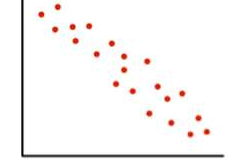

r is close to -1

**11. If 'w', 'x', 'y', and 'z' are the predictors and 't' is the target, then from the equation**  
t = 10 + 0.3w + 0.5x + 0.2y + z  
**if all the predictors are zero except 'z' and z = 8, then t = **  
18

Substitute, x = 0, y = 0, w = 0 in the equation, we get  
t = 10 + 0 + 0 + 0 + 8 = 18

**12. In a linear regression example, if the value of SST is 250 and the value of SSR is 215, what is the value of SSE?**

35

According to linear regression,
SST = SSR + SSE => 250 = 215 + SSE => SSE = 35

**13. When you predict the output of a variable based on a set of labeled data, it is called**  
supervised learning

1. Supervised learning is the form of machine learning in which learning occurs from a set of labeled data.

2. Unsupervised learning is the form of machine learning where the objective is to learn information about an unlabeled set of data.

3. Reinforcement learning is the form of machine learning where learning happens from actions taken in an environment based on reward and penalty.

**14. Which of the following is a practical application of supervised learning?**

Predicting the number of sales based on the past customer data

- Customer segmentation and reducing the dimensions are forms of unsupervised learning.
- Making a machine learn from its environment is an application of reinforcement learning.
- Predicting the number of sales using past customer data is an application of supervised learning as we can predict the sales based on a labeled set of customer data.